# Globally Averaged Ocean Temperature and Salinity

In [9]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from mom6_tools.m6toolbox import cime_xmlquery
import nc_time_axis
import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import xarray as xr
import yaml

In [2]:
# Read in the yaml file
diag_config_yml_path = "diag_config.yml"
diag_config_yml = yaml.load(open(diag_config_yml_path,'r'), Loader=yaml.Loader)

In [3]:
caseroot = diag_config_yml['Case']['CASEROOT']
casename = cime_xmlquery(caseroot, 'CASE')
DOUT_S = cime_xmlquery(caseroot, 'DOUT_S')
if DOUT_S:
  OUTDIR = cime_xmlquery(caseroot, 'DOUT_S_ROOT')+'/ocn/hist/'
else:
  OUTDIR = cime_xmlquery(caseroot, 'RUNDIR')

print('Output directory is:', OUTDIR)
print('Casename is:', casename)

Output directory is: /glade/derecho/scratch/gmarques/archive/g.e30_a03c.GJRAv4.TL319_t232_wgx3_hycom1_N75.2024.079/ocn/hist/
Casename is: g.e30_a03c.GJRAv4.TL319_t232_wgx3_hycom1_N75.2024.079


In [4]:
# create an empty class object
class args:
  pass

args.native = casename+diag_config_yml['Fnames']['native']
args.static = casename+diag_config_yml['Fnames']['static']
args.geom =   casename+diag_config_yml['Fnames']['geom']

In [5]:
# load data
ds = xr.open_mfdataset(OUTDIR+'/'+args.native, use_cftime=True)

ERROR 1: PROJ: proj_create_from_database: Open of /glade/work/gmarques/conda-envs/mom6-tools/share/proj failed


### Time series

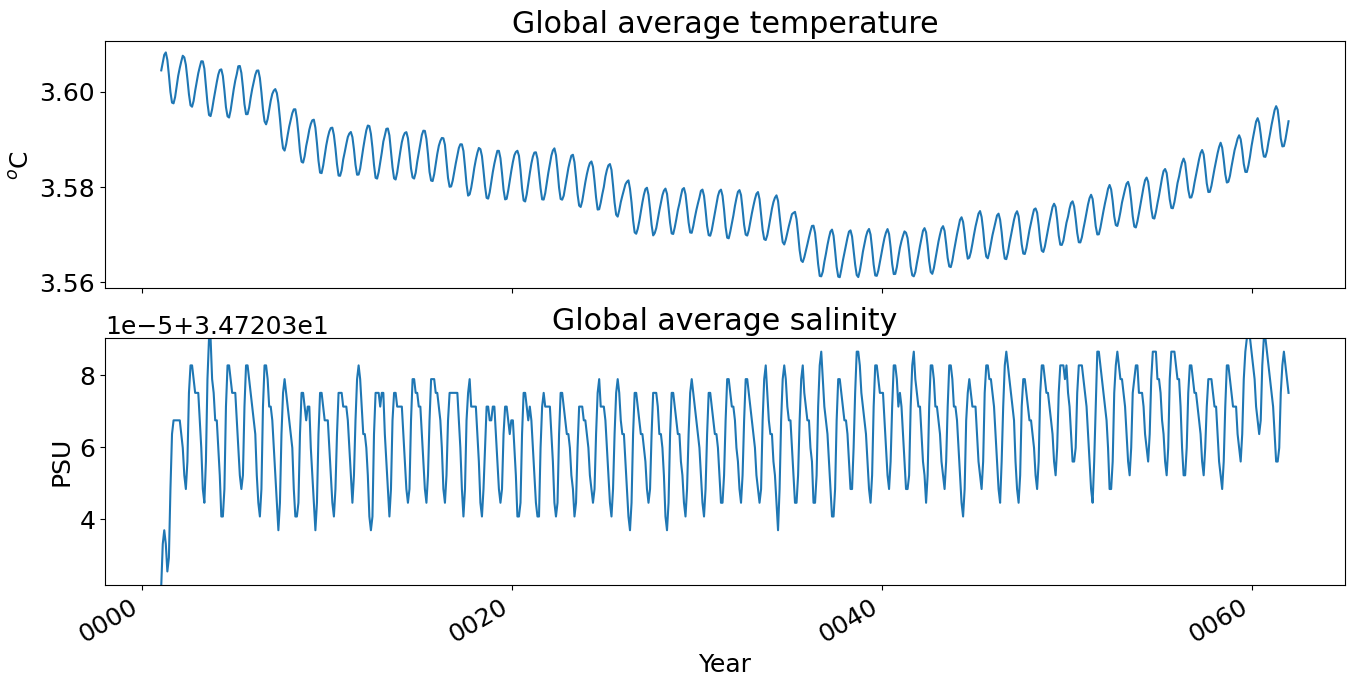

In [11]:
matplotlib.rcParams.update({'font.size': 18})
fig, axes = plt.subplots(nrows=2, figsize=(16, 8))
ax = axes[0]
ax.plot(ds.time, ds.thetaoga[:,0])
ax.set_ylabel(r'$^o$C')
ax.set_title("Global average temperature")
fig.autofmt_xdate()

ax = axes[1]
ax.plot(ds.time, ds.soga[:,0])
ax.set_title("Global average salinity")
ax.set_ylabel('PSU')
ax.set_ylim(ds.soga.min(),ds.soga.max())
ax.set_xlabel('Year')
fig.autofmt_xdate()